## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress
from sklearn import datasets
%matplotlib notebook
%matplotlib inline
from pandas.plotting import table


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata_df,study_results_df, how="outer", on="Mouse ID")

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = combined_data_df["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data_df.loc[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

# duplicate_mice = study_results_df[study_results_df.duplicated(subset=['Mouse ID', 'Timepoint'],keep=False)]
# duplicate_mice[['Mouse ID', 'Timepoint']]

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate = pd.DataFrame(duplicate_mice)
all_duplicate

,0
0,g989


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data_df= combined_data_df[combined_data_df['Mouse ID'].isin(duplicate_mice)==False]
cleaned_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
new_mouse_count = cleaned_data_df["Mouse ID"].nunique()
new_mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_group = cleaned_data_df.groupby("Drug Regimen")

dru_mean = drug_group["Tumor Volume (mm3)"].mean()
dru_median = drug_group["Tumor Volume (mm3)"].median()
dru_var = drug_group["Tumor Volume (mm3)"].var()
dru_std = drug_group["Tumor Volume (mm3)"].std()
dru_sem = drug_group["Tumor Volume (mm3)"].sem()


summary_stats_df = pd.DataFrame = ({"Mean": dru_mean, "Median": dru_median, 
                                    "Variance":dru_var, "Standard Deviation": dru_std, "SEM":dru_sem})


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

single_line_grp = cleaned_data_df.groupby("Drug Regimen")

summary_table = single_line_grp.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]

summary_table.head(10)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

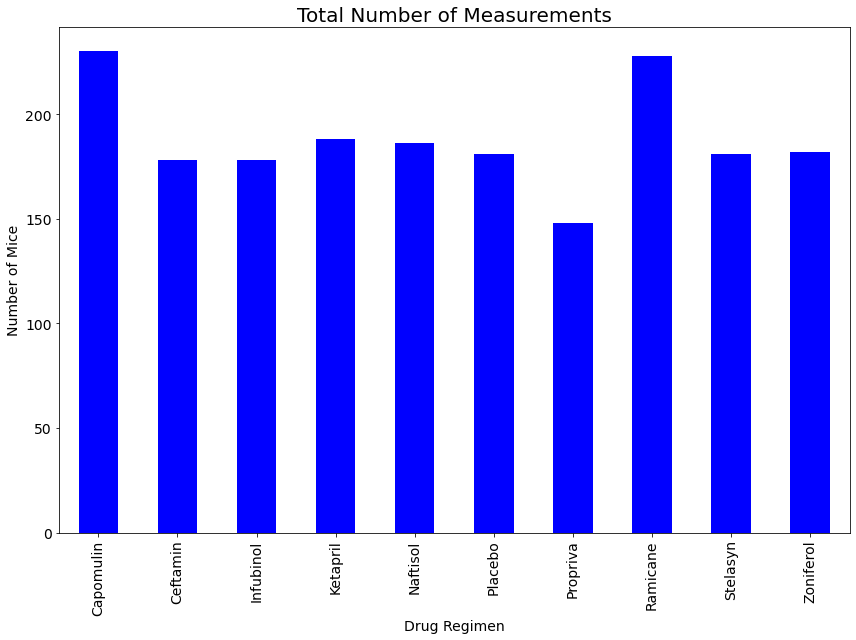

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drug_reg_total = cleaned_data_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 

pandas_plot = drug_reg_total.plot.bar(figsize=(12,9), color='b',fontsize = 14)
pandas_plot
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)
plt.title("Total Number of Measurements",fontsize = 20)
plt.tight_layout()
plt.show()


In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

mice_list =(cleaned_data_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mice_list

[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

Text(0, 0.5, 'Number of Mice')

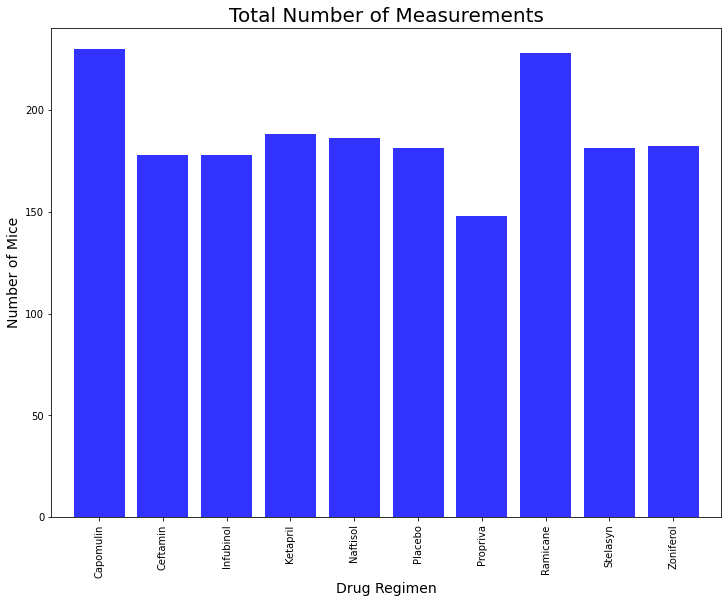

In [11]:
x_axis = np.arange(len(drug_reg_total))
fig1, ax1 = plt.subplots(figsize=(12, 9))
plt.bar(x_axis, mice_list, color='b', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice_list)+10)

plt.title("Total Number of Measurements",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)


[Text(0, 0.5, '')]

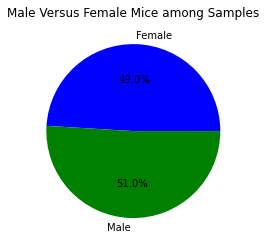

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Give a title to the chart
pie_title = "Male Versus Female Mice among Samples"

#Group the mice by gender
gender_grp = cleaned_data_df.groupby(["Sex"])

#Get the count of the gender
gender_count = gender_grp.count()

#Column neede fo the chart
column_name = gender_count.columns[0]

#Change the neame of the column 
gender_count = gender_count.rename(columns={column_name: 'Number of Data Points'})

#Plot the chart
ax = gender_count.plot.pie(y='Number of Data Points',autopct="%1.1f%%",title = pie_title, legend=False, colors = ["blue", "green"])
ax.set(ylabel="")

Text(0.5, 1.0, 'Male Versus Female Mice among Samples')

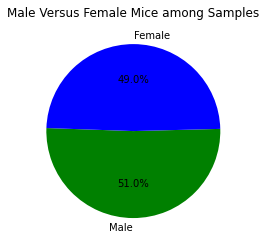

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ['Male','Female']

# The values of each section of the pie chart
sizes = [gender_count.loc['Male']['Number of Data Points'], gender_count.loc['Female']['Number of Data Points']]

plt.pie(sizes, labels=labels, autopct="%1.1f%%",startangle=178, colors = ["green", "blue"])
plt.title(pie_title)

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#Locate each drug regimen in the dataframe

cap_df = cleaned_data_df.loc[cleaned_data_df["Drug Regimen"] == "Capomulin",:]
ram_df = cleaned_data_df.loc[cleaned_data_df["Drug Regimen"] == "Ramicane",:]
inf_df = cleaned_data_df.loc[cleaned_data_df["Drug Regimen"] == "Infubinol",:]
ceft_df = cleaned_data_df.loc[cleaned_data_df["Drug Regimen"] == "Ceftamin",:]

# For Capomulin regimen
# Start by getting the last (greatest) timepoint for each mouse
caplast = cap_df.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cap_vol = caplast.to_frame()

cap_merge = pd.merge(cap_vol, cleaned_data_df, on=("Mouse ID","Timepoint"),how="left")
cap_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [15]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes

# Get tumor volume for Capomulin
cap_tumor = cap_merge["Tumor Volume (mm3)"]   
quartiles = cap_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

 # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
   

The lower quartile of Tumor Volume (mm3) is: 32.37735684
The upper quartile of Tumor Volume (mm3) is: 40.1592203
The interquartile range of Tumor Volume (mm3) is: 7.781863460000004
The the median of Tumor Volume (mm3) is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [16]:
# For Ramicane regimen
# Start by getting the last (greatest) timepoint for each mouse
ramlast = ram_df.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ram_vol = ramlast.to_frame()
ram_merge = pd.merge(ram_vol, cleaned_data_df, on=("Mouse ID","Timepoint"),how="left")
ram_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [17]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes

# Get tumor volume for Ramicane
ram_tumor = ram_merge["Tumor Volume (mm3)"]   
quartiles = ram_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

 # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
   

The lower quartile of Tumor Volume (mm3) is: 31.56046955
The upper quartile of Tumor Volume (mm3) is: 40.65900627
The interquartile range of Tumor Volume (mm3) is: 9.098536719999998
The the median of Tumor Volume (mm3) is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [18]:
# For Infubinol regimen
# Start by getting the last (greatest) timepoint for each mouse
inflast = inf_df.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
inf_vol = inflast.to_frame()
inf_merge = pd.merge(inf_vol, cleaned_data_df, on=("Mouse ID","Timepoint"),how="left")
inf_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [19]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes

# Get tumor volume for Infubinol
inf_tumor = inf_merge["Tumor Volume (mm3)"]   
quartiles = inf_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

 # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
   

The lower quartile of Tumor Volume (mm3) is: 54.04860769
The upper quartile of Tumor Volume (mm3) is: 65.52574285
The interquartile range of Tumor Volume (mm3) is: 11.477135160000003
The the median of Tumor Volume (mm3) is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [20]:
# For Ceftamin regimen
# Start by getting the last (greatest) timepoint for each mouse
ceftlast = ceft_df.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ceft_vol = ceftlast.to_frame()
ceft_merge = pd.merge(ceft_vol, cleaned_data_df, on=("Mouse ID","Timepoint"),how="left")
ceft_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [21]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes

# Get tumor volume for Ceftamin
ceft_tumor = ceft_merge["Tumor Volume (mm3)"]   
quartiles = ceft_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

 # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
   

The lower quartile of Tumor Volume (mm3) is: 48.72207785
The upper quartile of Tumor Volume (mm3) is: 64.29983003
The interquartile range of Tumor Volume (mm3) is: 15.577752179999997
The the median of Tumor Volume (mm3) is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


In [23]:
tumors_vol = [cap_final]  #cap_tumor,ram_tumor,inf_tumor,ceft_tumor
ax1.boxplot(tumors_vol)
fig1, ax1 = plt.subplots()
ax1.set_title('Total Volume of Tumors')
#ax1.set_ylabel('')
plt.show()

NameError: name 'cap_final' is not defined

## Line and Scatter Plots

In [34]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Locate the mouse ID to use for the plot
mouse_cap = cap_df.loc[cap_df["Mouse ID"] == "b742",:]
mouse_cap.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
290,b742,Capomulin,Male,7,21,0,45.000000,0
291,b742,Capomulin,Male,7,21,5,41.534097,0
292,b742,Capomulin,Male,7,21,10,41.999228,0
293,b742,Capomulin,Male,7,21,15,39.524843,0
294,b742,Capomulin,Male,7,21,20,37.950355,0


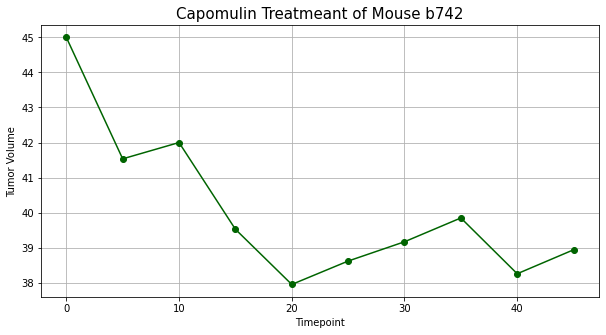

In [35]:
#Use the mouse ID to plot the line chart
x_axis = mouse_cap["Timepoint"]
y_axis = mouse_cap["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots(figsize=(10, 5))
plt.plot(x_axis, y_axis, marker ='o', color='darkgreen')
plt.title('Capomulin Treatmeant of Mouse b742',fontsize = 15)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.grid()
plt.show()

Text(0, 0.5, 'Tumor Volume')

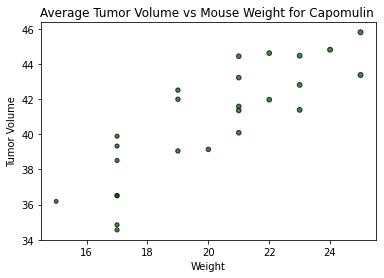

In [32]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_cap = cap_df.groupby(["Mouse ID"]).mean()
x_axis = avg_cap["Weight (g)"]
y_axis = avg_cap["Tumor Volume (mm3)"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="darkgreen", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.title('Average Tumor Volume vs Mouse Weight for Capomulin ',fontsize = 12)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
